In [32]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

## K100 data

In [2]:
BC_100 = pd.read_csv('BC_32ea_k100_cyto.csv')
Normal_100 = pd.read_csv('Normal_21ea_k100_cyto.csv')
PC_100 = pd.read_csv('PC_20ea_k100_cyto.csv')
RC_100 = pd.read_csv('RC_20ea_k100_cyto.csv')

In [3]:
#drop person id
BC_100.drop(['Unnamed: 0','id'], axis = 1, inplace = True)
Normal_100.drop(['Unnamed: 0','id'], axis = 1, inplace = True)
PC_100.drop(['Unnamed: 0','id'], axis = 1, inplace = True)
RC_100.drop(['Unnamed: 0','id'], axis = 1, inplace = True)

In [4]:
BC_100['cancer'] = 'BC'
Normal_100['cancer'] = 'normal'
PC_100['cancer'] = 'PC'
RC_100['cancer'] = "RC"

K100 = pd.concat([BC_100,Normal_100,PC_100,RC_100], axis = 0)

In [5]:
del [BC_100,Normal_100,PC_100,RC_100]

In [6]:
K100.shape

(94, 766)

In [7]:
K100.cancer.value_counts()

BC        32
RC        21
normal    21
PC        20
Name: cancer, dtype: int64

In [8]:
K100.isna().sum().sum()

647

In [9]:
K100_drop = K100.dropna(axis=0)

In [10]:
K100_drop.isna().sum().sum()

0

In [11]:
K100_drop.cancer.value_counts()

BC        32
normal    21
PC        19
RC        16
Name: cancer, dtype: int64

In [12]:
print(K100.shape)
print(K100_drop.shape)

(94, 766)
(88, 766)


In [13]:
K100_drop.head()

,cyto.10p11.1,cyto.10p11.21,cyto.10p11.22,cyto.10p11.23,cyto.10p12.1,cyto.10p12.2,cyto.10p12.31,cyto.10p12.32,cyto.10p12.33,cyto.10p13,...,cyto.9q33.1,cyto.9q33.2,cyto.9q33.3,cyto.9q34.11,cyto.9q34.12,cyto.9q34.13,cyto.9q34.2,cyto.9q34.3,<NA>,cancer
0,0.181000,-0.019967,0.044536,-0.026000,0.018065,0.00490,0.048000,0.084,-0.042857,0.01960,...,0.015217,-0.044152,-0.004636,0.014333,0.0116,-0.004737,-0.019571,-0.022065,-0.7450,BC
1,0.127000,0.010733,0.031250,0.048600,0.084413,0.05160,0.092889,0.102,-0.012857,0.07528,...,-0.043478,-0.046000,-0.007386,-0.009233,-0.0136,-0.060474,0.027714,0.002290,0.2550,BC
2,0.004000,0.007567,0.024964,0.081200,-0.011391,0.03605,-0.050194,-0.093,-0.059857,-0.01634,...,-0.158783,-0.193576,-0.075977,-0.106667,-0.0114,-0.072421,-0.127714,-0.168903,-0.1360,BC
3,0.135667,0.061467,-0.061286,-0.071733,0.070522,0.06270,0.020556,-0.002,0.050857,-0.00038,...,-0.019326,0.012515,-0.009591,0.016667,0.0438,0.019947,0.011500,0.031387,0.0100,BC
4,-0.251000,-0.134700,-0.175750,-0.165800,-0.112522,-0.06670,-0.127972,0.026,-0.198429,-0.00408,...,-0.074109,0.024758,0.097000,0.018667,0.1170,0.058368,0.038571,0.020065,-0.4595,BC


## 1.1 KNN 

In [14]:
#대대분류 삭제
K100_cluter = K100_drop.drop('cancer', axis = 1)
K100_cluter.shape

(88, 765)

In [15]:
mms = MinMaxScaler()
mms.fit(K100_cluter) #대대분류 뺀 column들만 갖고
cluster_transformed = mms.transform(K100_cluter)

In [16]:
# original 
k=4
km = KMeans(n_clusters = k, algorithm = 'auto')
km.fit(K100_cluter) # 데이터를 이용하여 클러스터링을 위한 학습 시작하고 중심점 추출
km_predict = pd.DataFrame(km.predict(K100_cluter)) # 학습된 모델이 맞춰 라벨 리턴
km_predict.columns = ['predict']
km_predict.predict.value_counts()

3    75
0    11
2     1
1     1
Name: predict, dtype: int64

In [17]:
# scale data
km = KMeans(n_clusters = k, algorithm = 'auto')
km.fit(cluster_transformed) # 데이터를 이용하여 클러스터링을 위한 학습 시작하고 중심점 추출
km_predict_scale = pd.DataFrame(km.predict(cluster_transformed)) # 학습된 모델이 맞춰 라벨 리턴
km_predict_scale.columns = ['predict']
km_predict_scale.predict.value_counts()

0    78
2     8
3     1
1     1
Name: predict, dtype: int64

## 1.2 SVM / random forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()
from sklearn.svm import SVC
svm1 = SVC()

C:\ProgramData\Anaconda1\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [19]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
cv = KFold(5, shuffle=True, random_state=0)

In [20]:
for i, (idx_train, idx_cv) in enumerate(cv.split(K100_drop)):
    df_train = K100_drop.iloc[idx_train]
    df_cv = K100_drop.iloc[idx_cv]
    
    x_train = df_train.drop(['cancer'], axis=1)
    y_train = df_train['cancer']
    
    x_cv = df_cv.drop(['cancer'], axis=1)
    y_cv = df_cv['cancer']
    
    print('[   K =',i,'   ]')
    print('-----------svm-----------')
    svm1.fit(x_train, y_train)
    print("train accurcacy = {}, cv accurcacy = {}".format(accuracy_score(y_train, svm1.predict(x_train)), accuracy_score(y_cv, svm1.predict(x_cv))))
    
    print('--------rf--------')
    rf1.fit(x_train, y_train)
    print("train accurcacy = {}, cv accurcacy = {}".format(accuracy_score(y_train, rf1.predict(x_train)), accuracy_score(y_cv, rf1.predict(x_cv))))
    

[   K = 0    ]
-----------svm-----------
train accurcacy = 0.34285714285714286, cv accurcacy = 0.4444444444444444
--------rf--------
train accurcacy = 0.9857142857142858, cv accurcacy = 0.3888888888888889
[   K = 1    ]
-----------svm-----------
train accurcacy = 0.38571428571428573, cv accurcacy = 0.2777777777777778
--------rf--------
train accurcacy = 0.9714285714285714, cv accurcacy = 0.3333333333333333
[   K = 2    ]
-----------svm-----------
train accurcacy = 0.34285714285714286, cv accurcacy = 0.4444444444444444
--------rf--------
train accurcacy = 0.9857142857142858, cv accurcacy = 0.4444444444444444
[   K = 3    ]
-----------svm-----------
train accurcacy = 0.352112676056338, cv accurcacy = 0.4117647058823529
--------rf--------
train accurcacy = 1.0, cv accurcacy = 0.6470588235294118
[   K = 4    ]
-----------svm-----------
train accurcacy = 0.39436619718309857, cv accurcacy = 0.23529411764705882
--------rf--------
train accurcacy = 0.971830985915493, cv accurcacy = 0.470588235

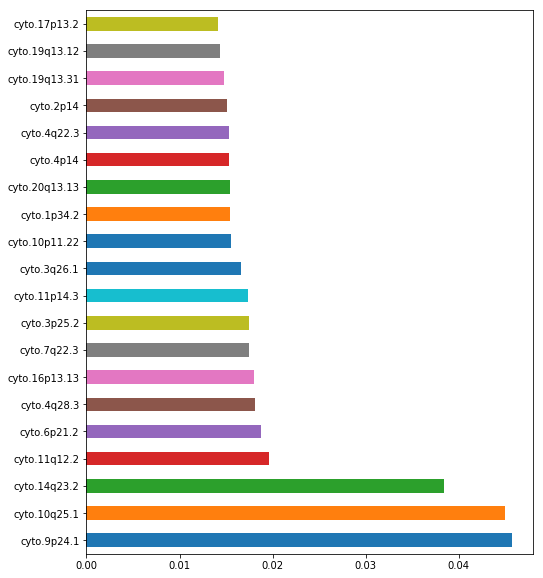

In [21]:
plt.figure(figsize=(8,10))

feat_importances = pd.Series(rf1.feature_importances_, index=x_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

## 1.3 Regression

In [24]:
K100_drop.cancer.value_counts()

BC        32
normal    21
PC        19
RC        16
Name: cancer, dtype: int64

In [25]:
def score_to_numeric(x):
    if x=='BC' : return 3
    if x=='PC' : return 2
    if x=='RC' : return 1
    if x=='normal' : return 0

In [26]:
K100_drop['cancer_num'] = K100_drop['cancer'].apply(score_to_numeric)
K100_drop.cancer_num.value_counts()

3    32
0    21
2    19
1    16
Name: cancer_num, dtype: int64

In [27]:
K100_drop.drop('cancer', axis = 1, inplace = True)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

X = K100_drop.iloc[:,:765]
Y = K100_drop['cancer_num']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

C:\ProgramData\Anaconda1\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
X.columns

In [29]:
log_clf = LogisticRegression(penalty='l2',multi_class='multinomial',solver ='newton-cg')
log_clf.fit(x_train,y_train)
print(log_clf.score(x_train,y_train))
print(log_clf.score(x_test, y_test))

0.9836065573770492
0.37037037037037035


In [34]:
len(X.columns)

765

In [36]:
list(log_clf.coef_)

[array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [30]:
log_clf = LogisticRegression(penalty='l1', multi_class='multinomial', solver='saga')
log_clf.fit(x_train,y_train)
print(log_clf.score(x_train,y_train))
print(log_clf.score(x_test, y_test))

0.4426229508196721
0.37037037037037035
